This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will analyze clustering methods over the Pima Indiand Diabetes dataset.

# Table of Contents

0. [Preliminaries](#preliminaries)
1. [K-means](#k_means) 
2. [Hierchical clustering](#hierarchical)
3. [Project Ideas](#ideas)

---
<a id='preliminaries'></a>
# 0 . Preliminaries

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# your code here
# ... add as many libraries as you want

from src.utils import plot_scatter, plot_silhouette

## Load dataset

In this lab exercise you are using the Pima Indian Diabetes data. Your hypothesis is that **there might be groups of patients with similar behavior** and you want to get some insights about them.

In [2]:
from src.ddbb import load_pima_indian

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

---
<a id='k_means'></a>
# 1. K-means

In [6]:
from sklearn.preprocessing import StandardScaler

X1 = X[['bmi','glucose']].values
X1 = StandardScaler().fit_transform(X1)

In [7]:
X1.shape

(768, 2)

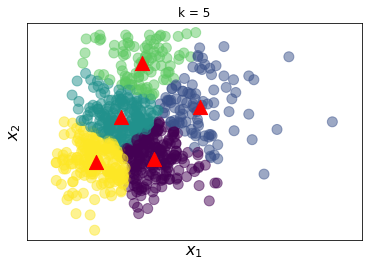

In [16]:
from sklearn.cluster import KMeans

# build the clustering model
k = 5
#two clusters
kmeans = KMeans(n_clusters = k).fit(X1)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
plt.show()

What if we use the target variable `y`?

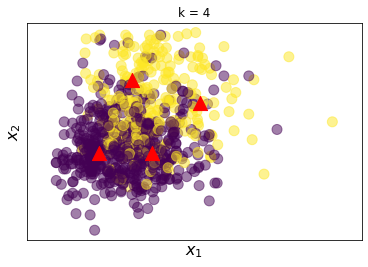

In [14]:
# do the plotting
#they are overlapped and there are more purple than yellow 
plot_scatter(X1,'k = ' + str(k), y, centroids)
plt.show()

Careful here, the purpose is to group our observations not classify them (so there might be subgroups within our observations having the same or differente outcome)

### How many cluster are there?

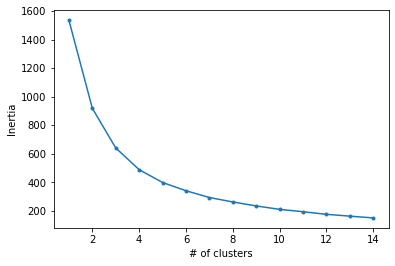

In [15]:
K = range(1,15)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')#metodo para saber cuantos clusters necesito. 
#la incercia siempre tiende a 0. 
#para establecer el numero optimo de clusters usamos el elbow method. 
#consiste en coger el codo del gráfico. 
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

#### Use the silhouette analysis

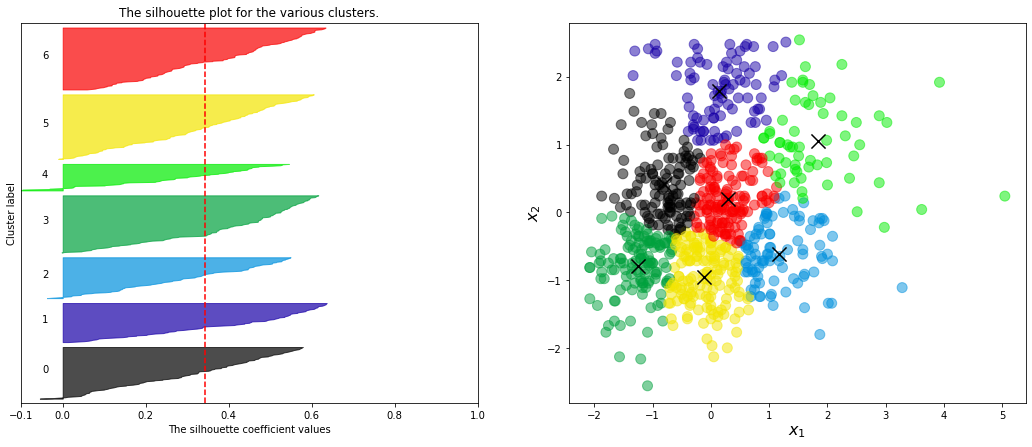

In [21]:
k=7
kmeans = KMeans(n_clusters=k).fit(X1)
plot_silhouette(X1,k,kmeans.labels_,kmeans.cluster_centers_)
#podemos utilizar este metodo para saber si estamos en lo cierto. 

### Let's analyze our observations depending on the cluster label

In [22]:
df = X.copy()
df['cluster_label'] = cluster_labels
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,2
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,4
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,3
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,4
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [23]:
df[df.cluster_label==3]


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_label
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,3
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,3
11,10,168.0,74.0,29.15342,155.548223,38.0,0.537,34,3
13,1,189.0,60.0,23.00000,846.000000,30.1,0.398,59,3
14,5,166.0,72.0,19.00000,175.000000,25.8,0.587,51,3
...,...,...,...,...,...,...,...,...,...
716,3,173.0,78.0,39.00000,185.000000,33.8,0.970,31,3
728,2,175.0,88.0,29.15342,155.548223,22.9,0.326,22,3
748,3,187.0,70.0,22.00000,200.000000,36.4,0.408,36,3
754,8,154.0,78.0,32.00000,155.548223,32.4,0.443,45,3


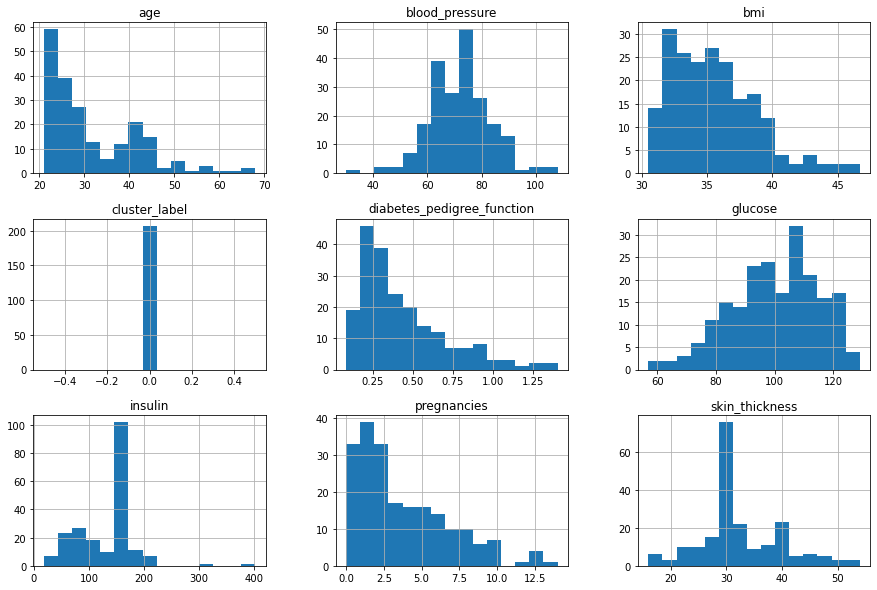

In [26]:
df[df.cluster_label==0].hist(figsize=(15,10),bins=15)
plt.show()

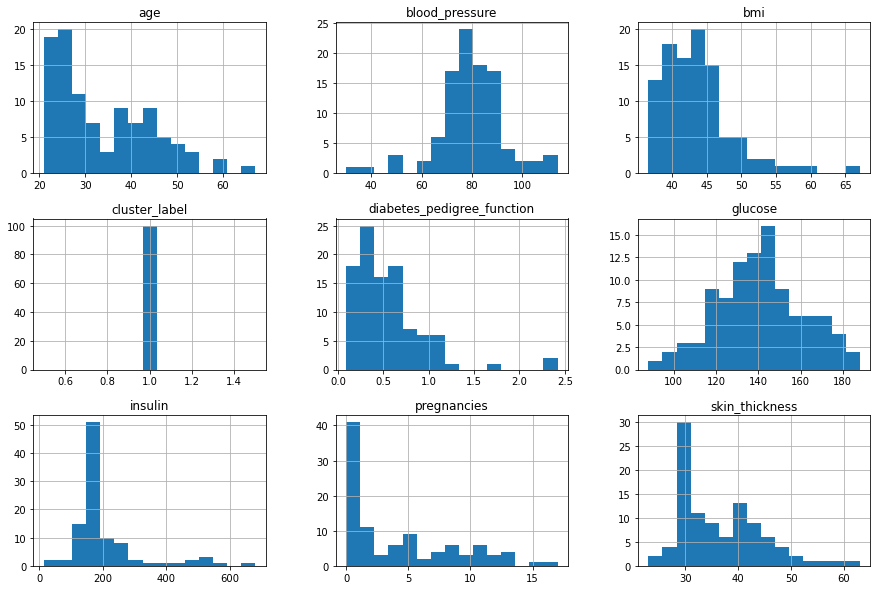

In [28]:
df[df.cluster_label==1].hist(figsize=(15,10),bins=15)
plt.show()

<div class = "alert alert-info">
<b>Note:</b> You can use either <b>cluster_labels</b> or <b>outcome</b> in the above representation
</div>

### PCA & K-means

Two options here:
    
1. K-means + PCA representation
2. PCA dimensionality reduction + K-means

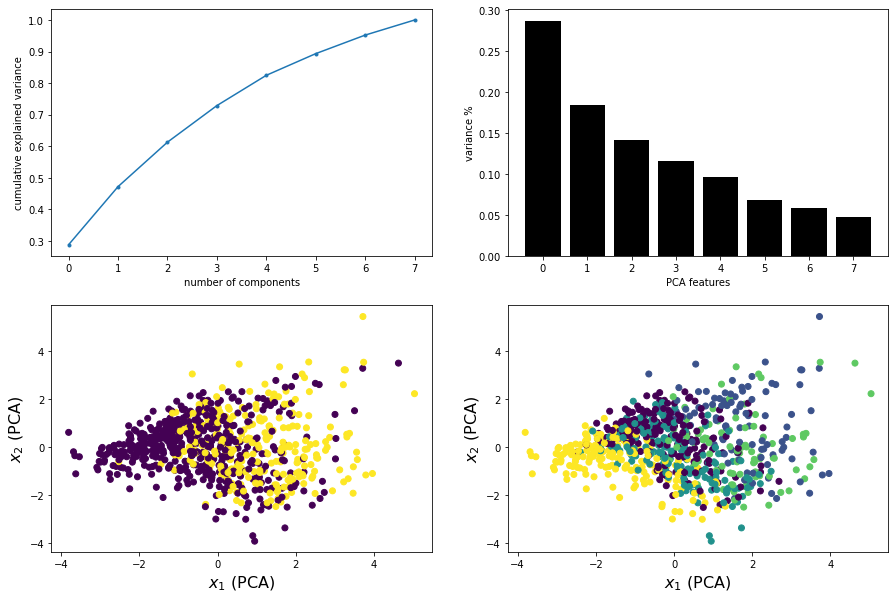

In [31]:
from sklearn.decomposition import PCA

# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Data visualization (just 2 components)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(2,2,2)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(range(pca.n_components_))

plt.subplot(2,2,3)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.subplot(2,2,4)
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.show()

#### Option 2:

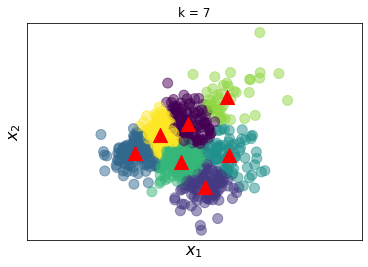

In [32]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)
kmeans = KMeans(n_clusters = k).fit(X_pca)#decrease dimensionality

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X_pca,'k = ' + str(k), cluster_labels, centroids)
plt.show()

In [38]:
df = X.copy()
df['cluster_label'] = cluster_labels
df['agg_label']=agg.labels_
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_label,agg_label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,2,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,3,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,2,3
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,3,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,0,1


---
<a id='hierarchical'></a>
# 2. Hierarchical clustering

In [34]:
X1.shape

(768, 2)

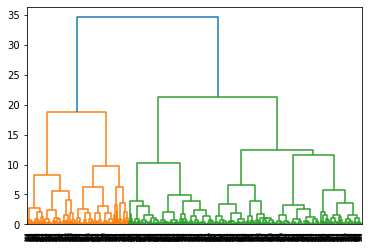

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

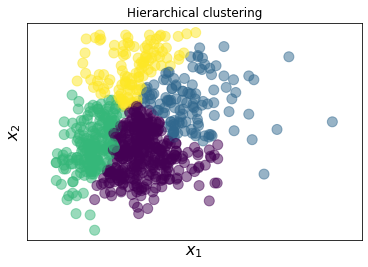

In [36]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(n_clusters=4).fit(X1)
plot_scatter(X1,'Hierarchical clustering', agg.labels_) 

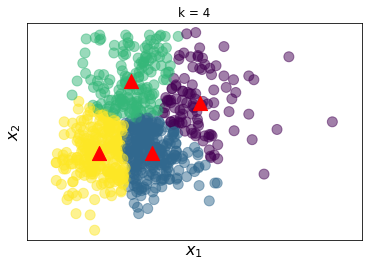

In [37]:
from sklearn.cluster import KMeans

# build the clustering model
k = 4
#two clusters
kmeans = KMeans(n_clusters = k).fit(X1)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
plt.show()

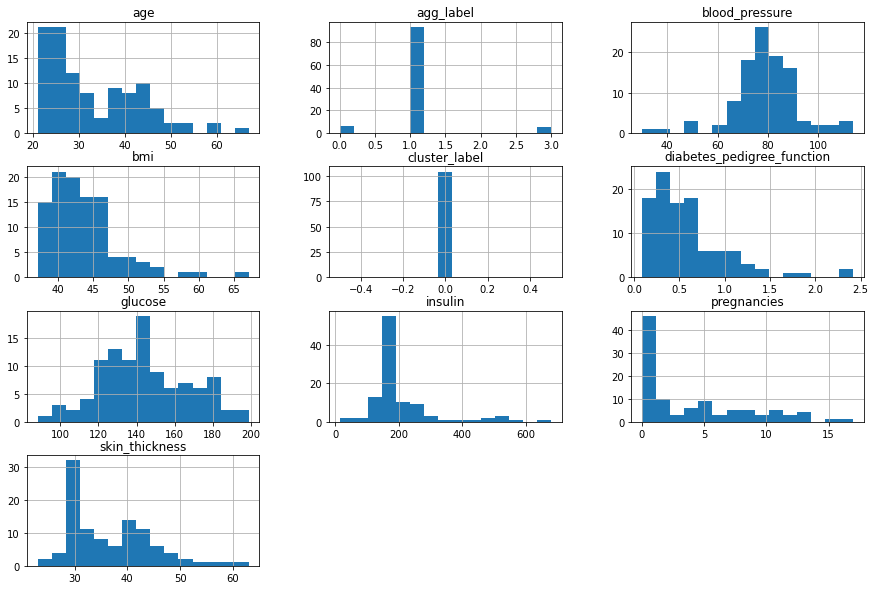

In [40]:
df[df.cluster_label==0].hist(figsize=(15,10),bins=15)
plt.show()

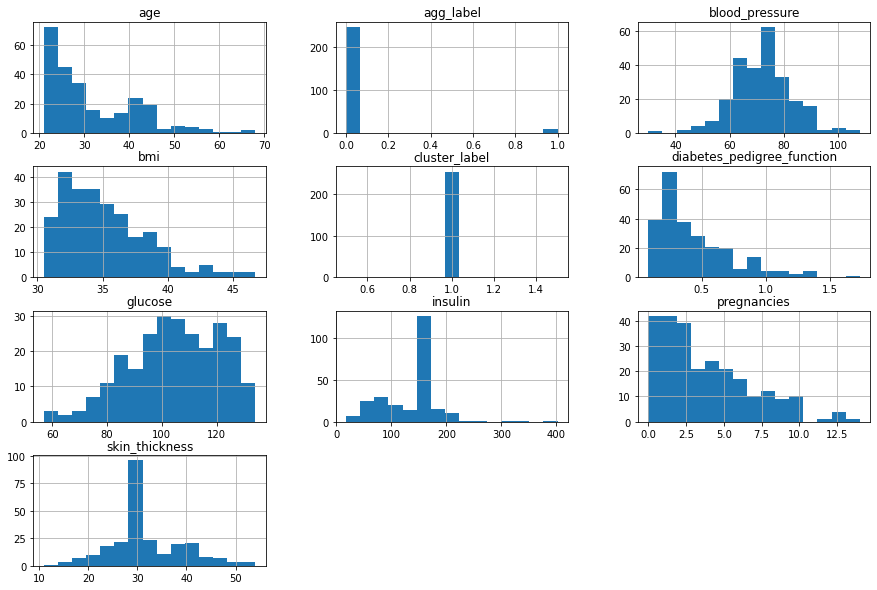

In [41]:
df[df.cluster_label==1].hist(figsize=(15,10),bins=15)
plt.show()

---
<a id='ideas'></a>
# Project Ideas


Here there are some ideas that you might want to consider for your project:

- Apply the k-means algorithm to your dataset, was it helpful? Did you get any insight? Comment on the number of cluster you used.

- What if you used Hierarchical clustering? Any differences? 


In all above, justify your decisions.

If we need we apply if we don't need we don't apply. 